In [1]:
from ModelOptimizer import *
from FeatureAnalyzer import *
from Cleanup import *
from ModelValidator import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Customer-Churn-Records.csv')
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
ordinal_columns = ['Card Type']
ordinal_mappings = [['SILVER', 'GOLD', 'PLATINUM', 'DIAMOND']]

In [3]:
pipeline, data_post_process = preprocessing_pipeline(data, 'Exited', columns_to_drop=columns_to_drop, ordinal_columns=ordinal_columns, ordinal_mappings=ordinal_mappings, date_columns=None)

2025-01-08 18:09:30,861 - INFO - Rozpoczęcie tworzenia pipeline'u przetwarzania danych.
2025-01-08 18:09:30,863 - INFO - Usuwane kolumny: ['RowNumber', 'CustomerId', 'Surname']
2025-01-08 18:09:30,868 - INFO - Zidentyfikowane cechy numeryczne: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']
2025-01-08 18:09:30,869 - INFO - Zidentyfikowane cechy kategoryczne: ['Geography', 'Gender']
2025-01-08 18:09:30,870 - INFO - Zidentyfikowane cechy porządkowe: ['Card Type']
2025-01-08 18:09:30,871 - INFO - Zidentyfikowane cechy binarne: ['HasCrCard', 'IsActiveMember', 'Complain']
2025-01-08 18:09:30,872 - INFO - Tworzenie pipeline'u przetwarzania danych...
2025-01-08 18:09:30,915 - INFO - Liczba kolumn po przetwarzaniu: 16
2025-01-08 18:09:30,916 - INFO - Kolumny po przetwarzaniu: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned', 'Geography_France', 'Geography_Ge

In [4]:
data_post_process['Exited'] = np.random.choice([0, 1], size=len(data_post_process))

In [5]:
feature_analyzer = FeatureAnalyzer(data_post_process, 'Exited', 0.2)

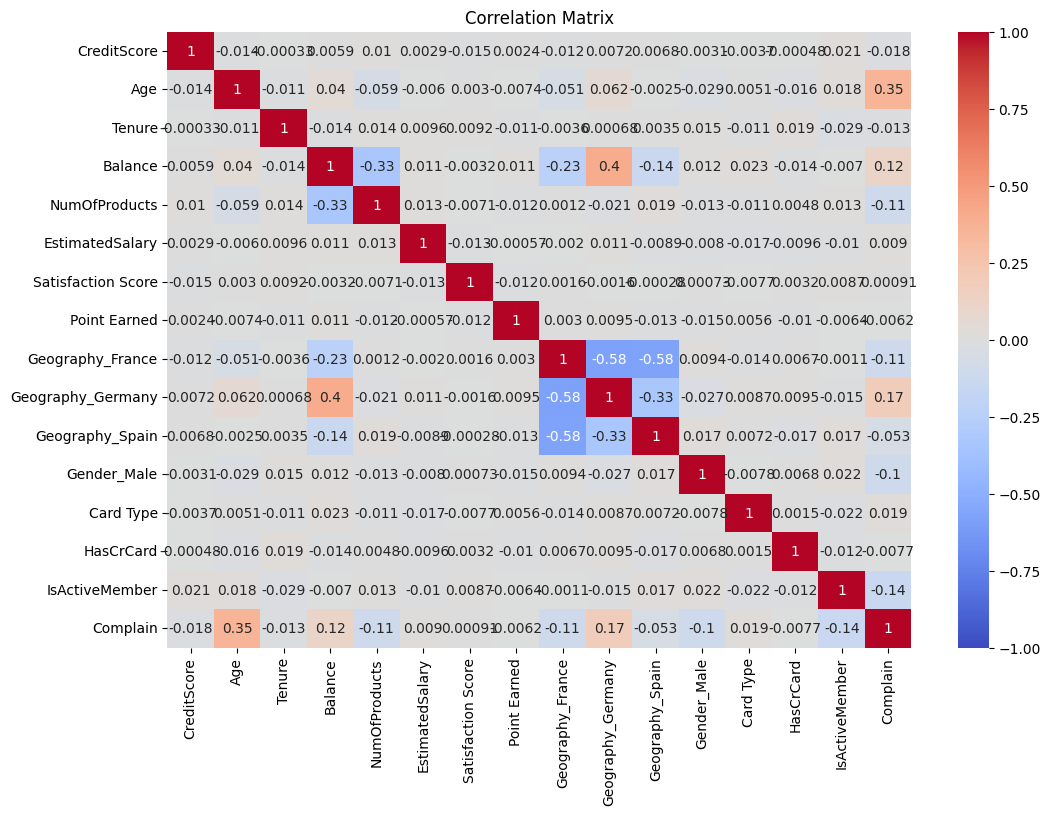

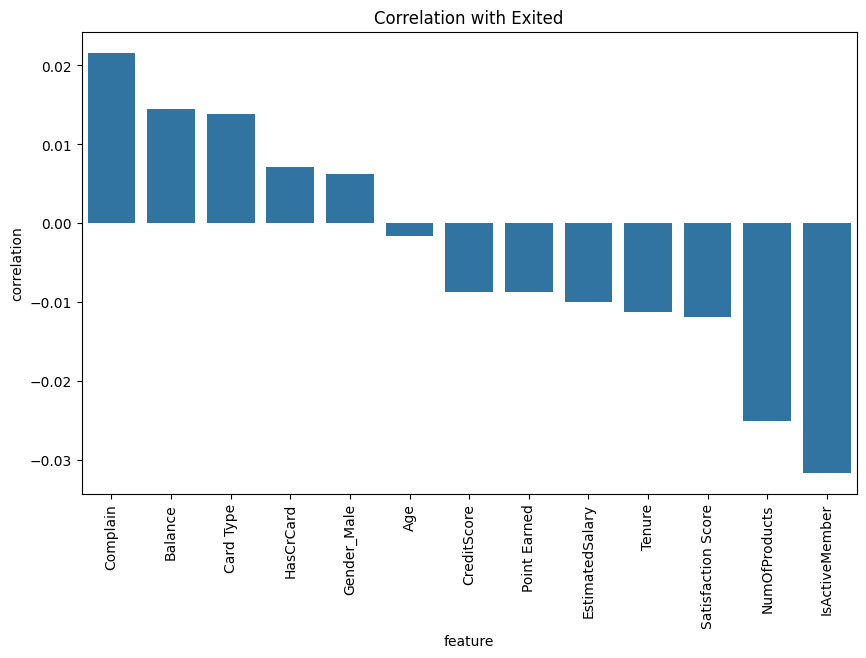

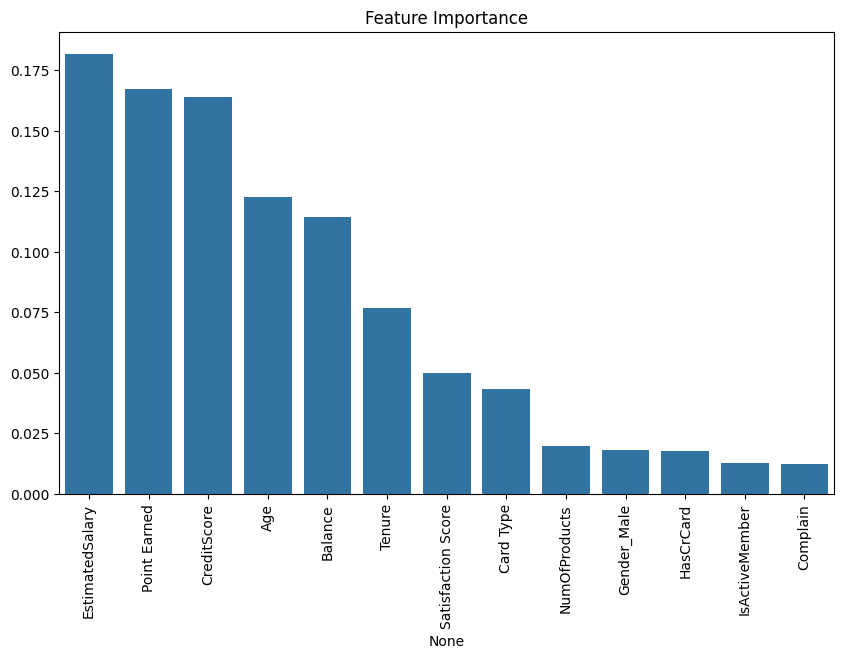

2025-01-08 18:09:42,807 - INFO - Usuwanie kolumn o wysokiej korelacji: 3
2025-01-08 18:09:42,809 - INFO - Tworzenie zmiennej golden na podstawie: EstimatedSalary
2025-01-08 18:09:42,811 - INFO - Utworzenie golden features w liczbie: 5
2025-01-08 18:09:42,813 - INFO - Końcowa liczba kolumn: 18


In [6]:
df, features = feature_analyzer.extract_best_features()

In [7]:
model_optimizer = ModelOptimizer(df, 'Exited')

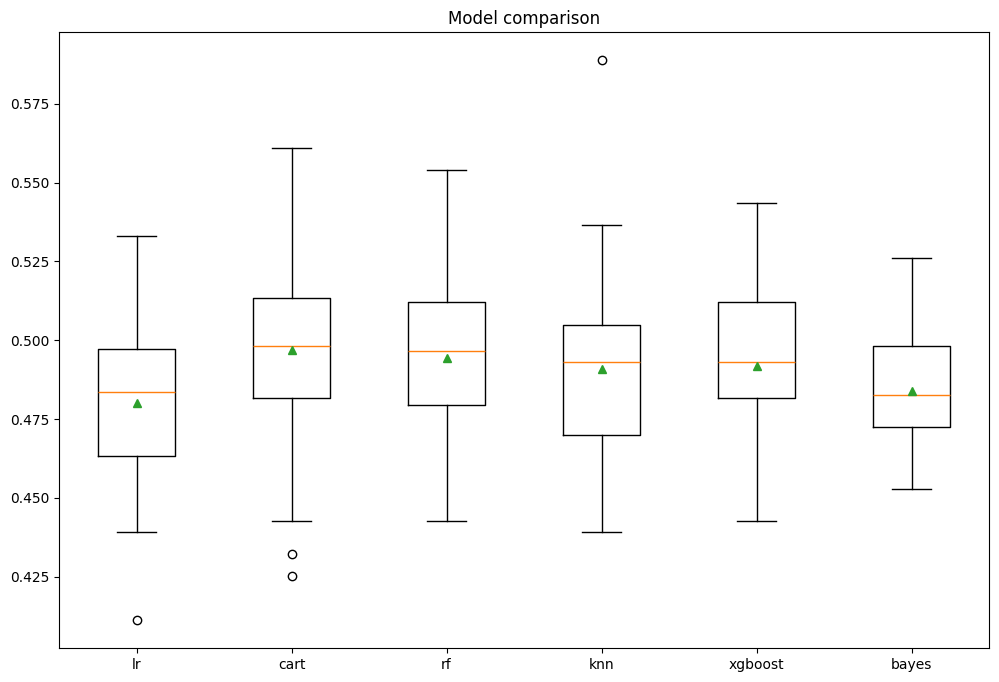

In [8]:
model_optimizer.get_models_candidates()

In [9]:
best_model = model_optimizer.optimize_model('rf')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [10]:
model_validator = ModelValidator(df, 'Exited', best_model)

In [11]:
model_validator.fit_model()

{'0': {'precision': 0.49030868628858576, 'recall': 0.47829131652661067, 'f1-score': 0.4842254519673875, 'support': 1428.0}, '1': {'precision': 0.4959404600811908, 'recall': 0.507969507969508, 'f1-score': 0.5018829168093119, 'support': 1443.0}, 'accuracy': 0.49320794148380354, 'macro avg': {'precision': 0.4931245731848883, 'recall': 0.4931304122480593, 'f1-score': 0.4930541843883497, 'support': 2871.0}, 'weighted avg': {'precision': 0.49313928523763806, 'recall': 0.49320794148380354, 'f1-score': 0.4931003115169858, 'support': 2871.0}}
Random (chance) Prediction: AUROC = 0.500
Model: AUROC = 0.502
Model: Gini = 0.003


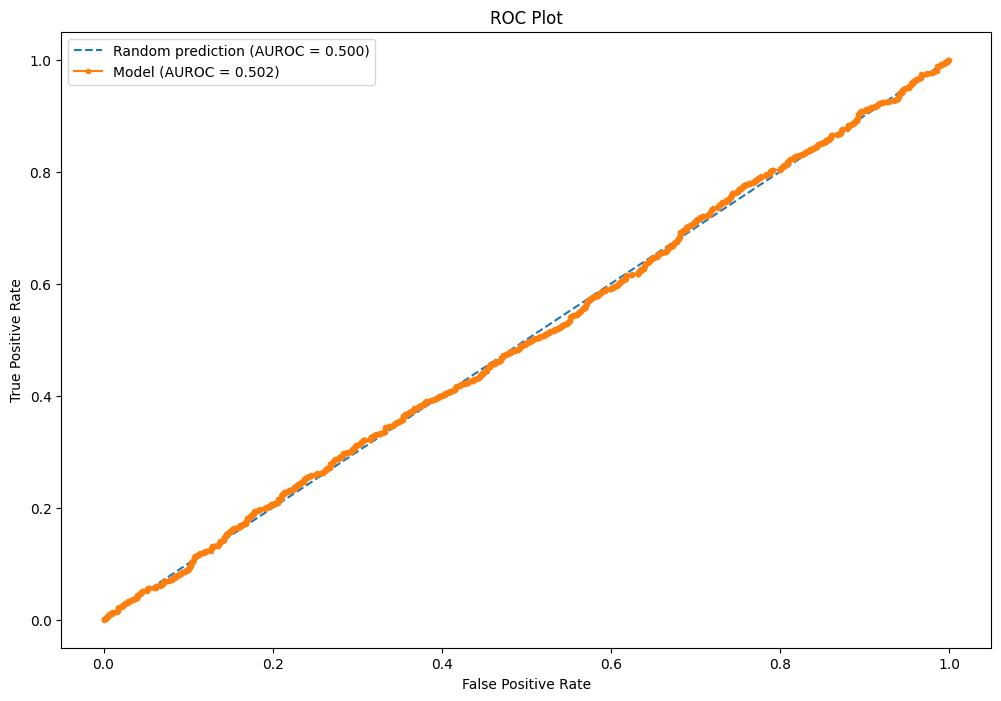

In [13]:
model_validator.get_model_summary()